In [7]:
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from birdset.configs.datamodule_configs import DatasetConfig
from birdset.datamodule.components.transforms import BirdSetTransformsWrapper
dataset_config = DatasetConfig(
        data_dir="data_birdset/HSN",
        dataset_name="HSN",
        hf_path="DBD-research-group/BirdSet",
        hf_name="HSN",
        n_workers=3,
        val_split=0.2,
        task="multilabel",
        classlimit=500,
        eventlimit=5,
        sampling_rate=32000,
        )

transforms = BirdSetTransformsWrapper(
    task=dataset_config.task,
)
datamodule = BirdSetDataModule(dataset=dataset_config)


In [8]:
datamodule.prepare_data()

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Extracting train split:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Setting num_proc from 3 back to 1 for the test_5s split to disable multiprocessing as it only contains one shard.


Generating test_5s split: 0 examples [00:00, ? examples/s]

Train event mapping (num_proc=3):   0%|          | 0/5460 [00:00<?, ? examples/s]

sampling: unique-identifier:   0%|          | 0/38170 [00:00<?, ? examples/s]

sampling: 100%|██████████| 21/21 [00:02<00:00, 10.06it/s]


One-hot-encoding train labels. (num_proc=3):   0%|          | 0/17940 [00:00<?, ? examples/s]

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Pass

One-hot-encoding test_5s labels. (num_proc=3):   0%|          | 0/12000 [00:00<?, ? examples/s]

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Pass

Saving the dataset (0/1 shards):   0%|          | 0/14352 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3588 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

In [14]:
datamodule.setup("fit")

In [15]:
train_loader = datamodule.train_dataloader()
# get the first batch
batch = next(iter(train_loader))
# get shape of the batch
print(batch["input_values"].shape)
print(batch["labels"].shape)

2025-01-28 12:24:29.393602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 12:24:29.393639: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 12:24:29.395073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 12:24:29.488181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


torch.Size([32, 1, 128, 1024])
torch.Size([32, 21])


In [84]:
from functools import partial
from biofoundation.modules.models.audiomae import AudioMAEModel
from birdset.configs import NetworkConfig, MulticlassMetricsConfig
from torch import nn

model =  AudioMAEModel(num_classes=datamodule.num_classes)
model

/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for DBD-research-group/BirdSet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DBD-research-group/BirdSet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


AudioMAEModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none'

In [23]:
melspec= model.preprocess(batch['input_values'][0])
print(melspec.size())
melspec

torch.Size([1, 1, 1024, 128])


tensor([[[[ 0.0879, -0.1448,  0.2320,  ...,  1.0810,  0.9851,  1.1085],
          [ 0.8520,  0.3728,  0.7496,  ...,  0.9720,  0.9355,  0.9635],
          [ 1.0757,  0.7039,  1.0808,  ...,  1.2369,  1.2061,  1.2079],
          ...,
          [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
          [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
          [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]]]])

In [36]:
embeddings = model.get_embeddings(batch['input_values'][0])
print(embeddings.size())
embeddings

torch.Size([1, 768])


tensor([[-5.5802e-02, -5.1612e-03, -9.1176e-02, -7.0981e-02, -1.5924e-01,
         -4.6705e-02, -1.5741e-01, -9.2672e-02,  3.0200e-02, -1.4239e-02,
         -2.9631e-01, -1.5146e-02, -5.7024e-03, -4.2623e-03, -9.0804e-02,
         -2.3492e-02, -5.8451e-03, -4.6570e-02,  7.2527e-03, -2.2280e-02,
         -1.4691e-01, -3.0508e-02, -8.3591e-02, -5.6695e-02, -9.8513e-02,
         -5.5567e-02, -3.6628e-02,  4.4137e-02, -1.1131e-02,  4.8503e-02,
         -1.0089e-01, -1.2892e-01, -2.6822e-02, -3.6965e-02, -1.2642e-02,
         -2.9226e-02, -4.5288e-02, -1.8447e-02, -1.3904e-01, -1.0961e-01,
         -8.8908e-02, -8.3141e-02, -5.8948e-02, -2.1350e-02,  3.1231e-03,
         -4.6166e-02, -7.0890e-02, -2.6003e-02,  2.7877e-02, -8.7055e-02,
         -5.0934e-02, -4.2907e-02,  9.5327e-03, -4.0284e-02, -6.4604e-02,
         -5.4470e-02, -2.6052e-02, -6.3104e-02, -7.9351e-02,  2.6942e-02,
          5.8276e-03, -3.7060e-02,  1.4764e-02, -1.6773e-01, -7.4977e-03,
         -7.7646e-03,  4.9723e-02, -6.

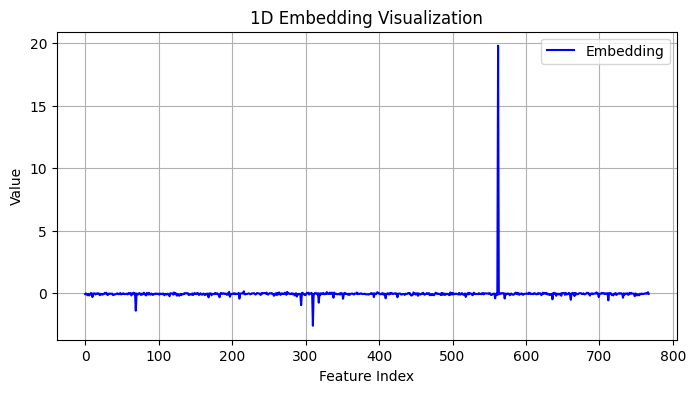

In [43]:
import torch
import matplotlib.pyplot as plt

# Example tensor (replace this with your actual tensor)
embedding_tensor = embeddings

# Convert tensor to numpy array for plotting
embedding_array = embedding_tensor.squeeze()
embedding_array=embedding_array.detach().numpy()  # Remove the first dimension

# Plot the embedding as a line chart
plt.figure(figsize=(8, 4))
plt.plot(embedding_array, color='b', label='Embedding')
plt.title('1D Embedding Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



(1024, 128)


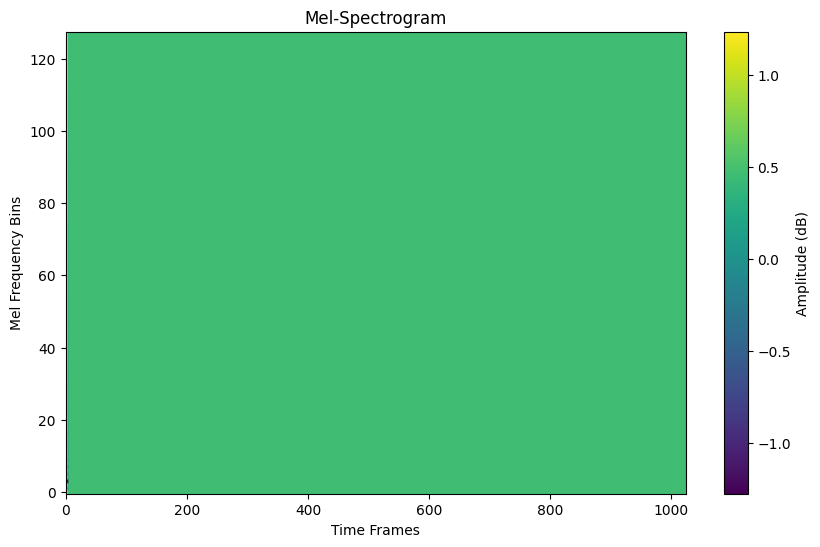

In [75]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Example tensor (replace this with your actual tensor)
melspec_tensor = melspec # Replace this with your actual tensor
melspec_array = melspec_tensor.squeeze().detach().numpy()  # Remove the batch and channel dimensions
print (melspec_array.shape)
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(melspec_array.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude (dB)')
plt.title('Mel-Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Mel Frequency Bins')
plt.show()



In [80]:
from torch.nn import BCEWithLogitsLoss
from torch.nn.modules.loss import _Loss
logits = model.forward(batch['input_values'][0])
print(logits.size())
model.load_model

torch.Size([1, 21])


<bound method AudioMAEModel.load_model of AudioMAEModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True

In [109]:
logits = model.forward(batch['input_values'][0])
#loss = torch.nn.BCEWithLogitsLoss(logits[0],batch['labels'][0])
print(batch['labels'][0].size())
print(logits[0].size())
labels = batch['labels'][0]

# Create the loss function
criterion = torch.nn.BCEWithLogitsLoss()

# Compute the loss
loss = criterion(logits[0], labels)

print(f"Loss: {loss.item()}")

torch.Size([21])
torch.Size([21])
Loss: 0.6337890625
